### 콘크리트 강도 예측
> https://www.kaggle.com/datasets/elikplim/concrete-compressive-strength-data-set

#### Features
1. cement - 시멘트(kg)
2. blast_furnace_slag - 고로 슬래그(kg)
3. fly_ash - 비산회(kg)
4. water - 물(kg)
5. superplasticizer - 슈퍼플라스티서(가소재, kg)
6. coarse_aggregate - 골재(kg)
7. fine_aggregate - 미세 골재(kg)
8. age - 경과 시간
9. concrete_compressive_strength - 콘크리트 강도, 압력

In [48]:
import pandas as pd

c_df_origin = pd.read_csv('./datasets/concrete_data.csv')
c_df = c_df_origin.copy()
c_df

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [49]:
c_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [50]:
c_df.duplicated().sum()

25

In [51]:
c_df = c_df.drop_duplicates()

In [52]:
c_df.duplicated().sum()

0

In [53]:
c_df.isna().sum().sum()

0

array([[<Axes: title={'center': 'cement'}>,
        <Axes: title={'center': 'blast_furnace_slag'}>,
        <Axes: title={'center': 'fly_ash'}>],
       [<Axes: title={'center': 'water'}>,
        <Axes: title={'center': 'superplasticizer'}>,
        <Axes: title={'center': 'coarse_aggregate'}>],
       [<Axes: title={'center': 'fine_aggregate '}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'concrete_compressive_strength'}>]],
      dtype=object)

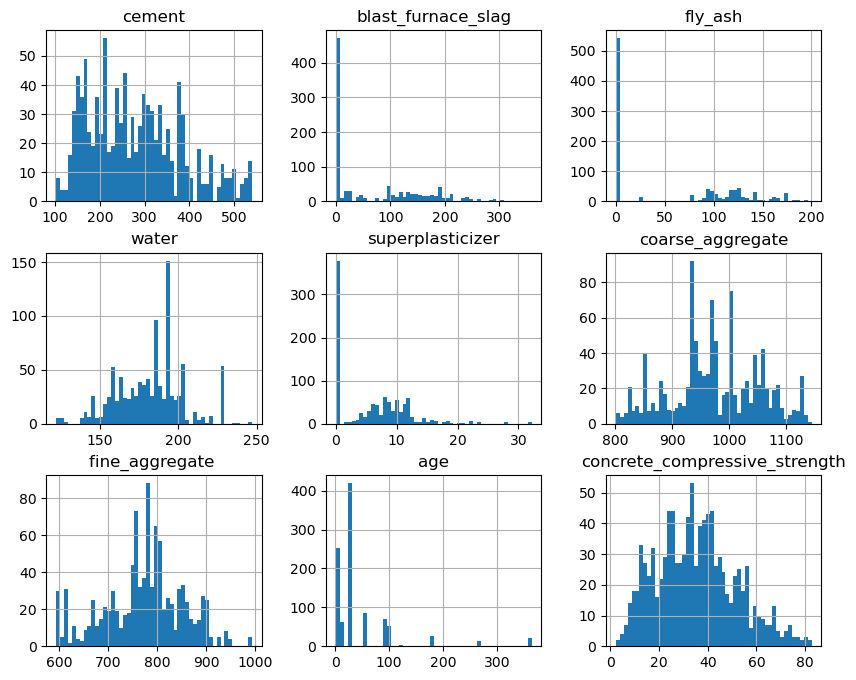

In [54]:
c_df.hist(figsize=(10, 8), bins=50)

In [55]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = c_df.iloc[:, :-1], c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

#### LinearRegression

In [57]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 116.2002, RMSE: 10.7796, MSLE: 0.1056, RMSLE: 0.3250, R2: 0.5443


In [58]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

features, targets = c_df.iloc[:, :-1], c_df.iloc[:, -1]

poly_features = PolynomialFeatures(degree=3).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

#### PolynomialFeatures 후 LinearRegression

In [59]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 39.8754, RMSE: 6.3147, MSLE: 0.0348, RMSLE: 0.1866, R2: 0.8436


In [60]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

features, targets = c_df.iloc[:, :-1], c_df.iloc[:, -1]

poly_features = PolynomialFeatures(degree=3).fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(poly_features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()

# cross_val_score로 교차검증(cross_val_score이 알아서 데이터를 분리하여서 교차검증을 해준다)
score = cross_val_score(l_r, X_train, y_train, cv=5, scoring='r2')
print('r2:', np.round(np.mean(score), 5))

r2: 0.79237


In [61]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split

features, targets = c_df.iloc[:, :-1], c_df.iloc[:, -1]

poly_features = PolynomialFeatures(degree=3).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=124)

dt_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124, n_estimators=100)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor()
lgb_r = LGBMRegressor(n_estimators=100)

models = [dt_r, rf_r, gb_r, xgb_r, lgb_r]
for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

DecisionTreeRegressor
MSE: 48.2259, RMSE: 6.9445, MSLE: 0.0427, RMSLE: 0.2065, R2: 0.8109
RandomForestRegressor
MSE: 24.8581, RMSE: 4.9858, MSLE: 0.0254, RMSLE: 0.1594, R2: 0.9025
GradientBoostingRegressor
MSE: 23.4471, RMSE: 4.8422, MSLE: 0.0246, RMSLE: 0.1569, R2: 0.9080
XGBRegressor
MSE: 19.3213, RMSE: 4.3956, MSLE: 0.0204, RMSLE: 0.1428, R2: 0.9242
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001364 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 23924
[LightGBM] [Info] Number of data points in the train set: 804, number of used features: 164
[LightGBM] [Info] Start training from score 35.086517
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

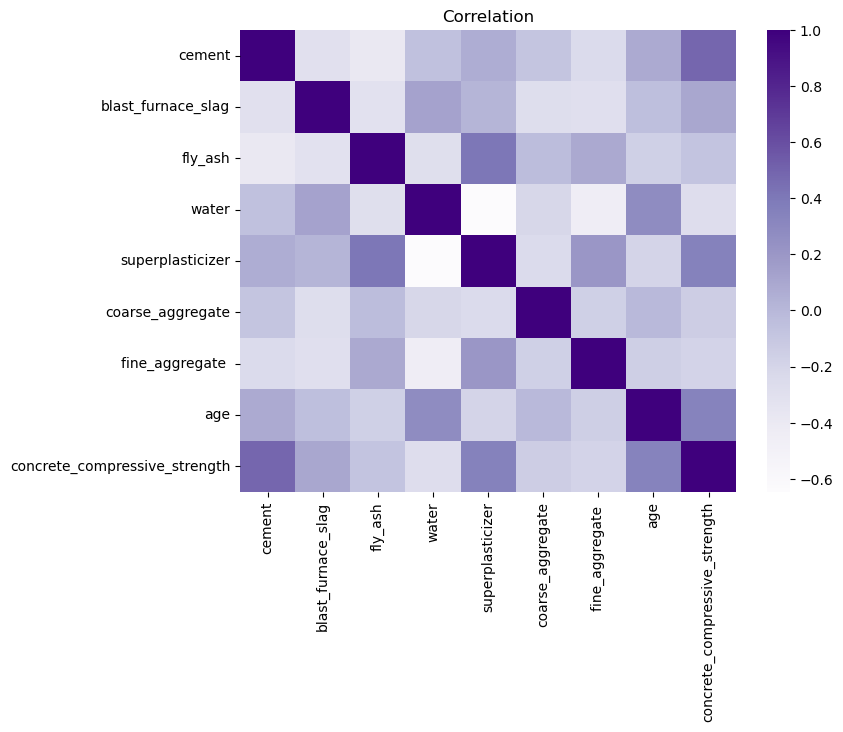

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 6))
corr = c_df.corr()
heatmap = sns.heatmap(corr, cmap='Purples')
heatmap.set_title('Correlation')
plt.show()

In [63]:
corr.concrete_compressive_strength.sort_values(ascending=False)[1:]

cement                0.488283
superplasticizer      0.344209
age                   0.337367
blast_furnace_slag    0.103374
fly_ash              -0.080648
coarse_aggregate     -0.144717
fine_aggregate       -0.186448
water                -0.269624
Name: concrete_compressive_strength, dtype: float64

- 타겟피쳐와의 상관관계가 전체적으로 낮다

In [64]:
corr

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
cement,1.000000,-0.303324,-0.385610,-0.056625,0.060906,-0.086205,-0.245375,0.086348,0.488283
blast_furnace_slag,-0.303324,1.000000,-0.312352,0.130262,0.019800,-0.277559,-0.289685,-0.042759,0.103374
fly_ash,-0.385610,-0.312352,1.000000,-0.283314,0.414213,-0.026468,0.090262,-0.158940,-0.080648
water,-0.056625,0.130262,-0.283314,1.000000,-0.646946,-0.212480,-0.444915,0.279284,-0.269624
superplasticizer,0.060906,0.019800,0.414213,-0.646946,1.000000,-0.241721,0.207993,-0.194076,0.344209
coarse_aggregate,-0.086205,-0.277559,-0.026468,-0.212480,-0.241721,1.000000,-0.162187,-0.005264,-0.144717
fine_aggregate,-0.245375,-0.289685,0.090262,-0.444915,0.207993,-0.162187,1.000000,-0.156572,-0.186448
age,0.086348,-0.042759,-0.158940,0.279284,-0.194076,-0.005264,-0.156572,1.000000,0.337367
concrete_compressive_strength,0.488283,0.103374,-0.080648,-0.269624,0.344209,-0.144717,-0.186448,0.337367,1.000000


- water와 superplasticizer가 서로 관계가 굉장히 크다

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [66]:
get_vif(features)

,vif_score,feature
0,15.143662,cement
1,3.260685,blast_furnace_slag
2,4.170393,fly_ash
3,81.401338,water
4,5.170736,superplasticizer
5,84.735483,coarse_aggregate
6,72.490935,fine_aggregate
7,1.696257,age


In [67]:
from statsmodels.api import OLS

features, targets = c_df.iloc[:, :-1], c_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                      OLS Regression Results                                      
Dep. Variable:     concrete_compressive_strength   R-squared (uncentered):                   0.930
Model:                                       OLS   Adj. R-squared (uncentered):              0.930
Method:                            Least Squares   F-statistic:                              1665.
Date:                           Tue, 14 May 2024   Prob (F-statistic):                        0.00
Time:                                   12:59:22   Log-Likelihood:                         -3764.6
No. Observations:                           1005   AIC:                                      7545.
Df Residuals:                                997   BIC:                                      7585.
Df Model:                                      8                                                  
Covariance Type:                       nonrobust                                                  
          

- 모든 피쳐가 타겟과의 관계가 적지만 OLS가 양호하고 결과가 잘 나오기에 보류

#### 가장 결과가 좋았던 LGBM을 사용한 검증

In [68]:
features, targets = c_df.iloc[:, :-1], c_df.iloc[:, -1]

poly_features = PolynomialFeatures(degree=3).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=124)

X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(X_train, y_train, test_size=0.2, random_state=124)

lgb_r = LGBMRegressor(n_estimators=50)

score = cross_val_score(lgb_r, X_train, y_train, cv=5, scoring='r2')
print('r2:', np.round(np.mean(score), 5))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001506 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 19274
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 164
[LightGBM] [Info] Start training from score 35.247994
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

#### train

In [69]:
lgb_r.fit(X_train, y_train)

prediction = lgb_r.predict(X_train)
get_evaluation(y_train, prediction)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002182 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 23924
[LightGBM] [Info] Number of data points in the train set: 804, number of used features: 164
[LightGBM] [Info] Start training from score 35.086517
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
MSE: 4.5481, RMSE: 2.1326, MSLE: 0.0044, RMSLE: 0.0661, R

#### test

In [70]:
lgb_r.fit(X_train, y_train)

prediction = lgb_r.predict(X_test)
get_evaluation(y_test, prediction)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001684 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 23924
[LightGBM] [Info] Number of data points in the train set: 804, number of used features: 164
[LightGBM] [Info] Start training from score 35.086517
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
MSE: 21.7049, RMSE: 4.6588, MSLE: 0.0218, RMSLE: 0.1477, 

#### validation

In [71]:
lgb_r.fit(X_train_val, y_train_val)

prediction = lgb_r.predict(X_test_val)
get_evaluation(y_test_val, prediction)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001520 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 19565
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 164
[LightGBM] [Info] Start training from score 35.273421
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

#### kfold

In [72]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10, shuffle=True, random_state=124)

score = cross_val_score(lgb_r, X_train, y_train, cv=kfold, scoring='r2')
print(score)
print(np.round(np.mean(score), 4))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001718 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 21855
[LightGBM] [Info] Number of data points in the train set: 723, number of used features: 164
[LightGBM] [Info] Start training from score 35.254066
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001808 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 23924
[LightGBM] [Info] Number of data points in the train set: 804, number of used features: 164
[LightGBM] [Info] Start training from score 35.086517
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
MSE: 4.5481, RMSE: 2.1326, MSLE: 0.0044, RMSLE: 0.0661, R

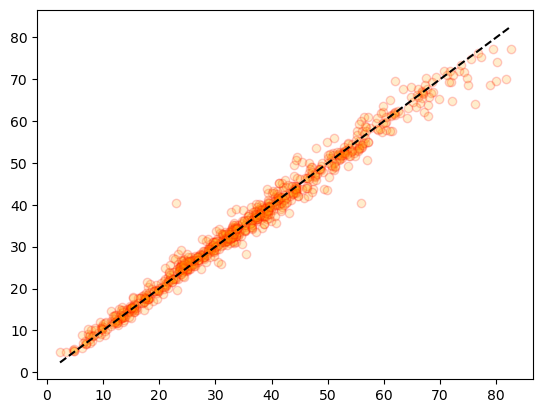

In [73]:
import matplotlib.pyplot as plt

lgb_r = LGBMRegressor(n_estimators=50)

lgb_r.fit(X_train, y_train)
prediction = lgb_r.predict(X_train)
get_evaluation(y_train, prediction)

fig, ax = plt.subplots()
ax.scatter(y_train, prediction, edgecolors='red', c='orange', alpha=0.2)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
plt.show()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001704 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 23924
[LightGBM] [Info] Number of data points in the train set: 804, number of used features: 164
[LightGBM] [Info] Start training from score 35.086517
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
MSE: 21.7049, RMSE: 4.6588, MSLE: 0.0218, RMSLE: 0.1477, 

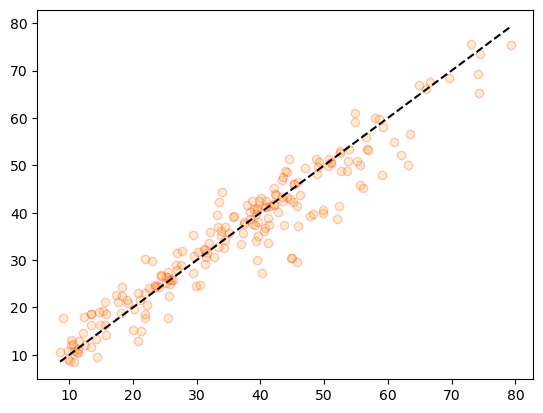

In [74]:
lgb_r.fit(X_train, y_train)
prediction = lgb_r.predict(X_test)
get_evaluation(y_test, prediction)

fig, ax = plt.subplots()
ax.scatter(y_test, prediction, edgecolors='red', c='orange', alpha=0.2)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.show()

#### 과적합이 의심되어 전처리

In [75]:
c_df

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


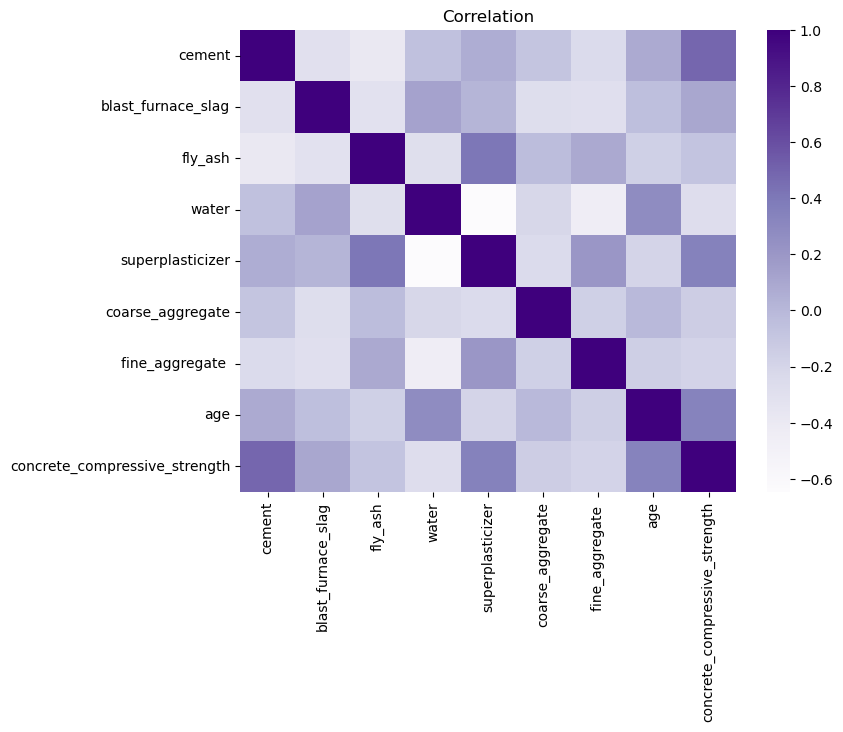

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 6))
corr = c_df.corr()
heatmap = sns.heatmap(corr, cmap='Purples')
heatmap.set_title('Correlation')
plt.show()

In [112]:
corr

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
cement,1.000000,-0.303324,-0.385610,-0.056625,0.060906,-0.086205,-0.245375,0.086348,0.488283
blast_furnace_slag,-0.303324,1.000000,-0.312352,0.130262,0.019800,-0.277559,-0.289685,-0.042759,0.103374
fly_ash,-0.385610,-0.312352,1.000000,-0.283314,0.414213,-0.026468,0.090262,-0.158940,-0.080648
water,-0.056625,0.130262,-0.283314,1.000000,-0.646946,-0.212480,-0.444915,0.279284,-0.269624
superplasticizer,0.060906,0.019800,0.414213,-0.646946,1.000000,-0.241721,0.207993,-0.194076,0.344209
coarse_aggregate,-0.086205,-0.277559,-0.026468,-0.212480,-0.241721,1.000000,-0.162187,-0.005264,-0.144717
fine_aggregate,-0.245375,-0.289685,0.090262,-0.444915,0.207993,-0.162187,1.000000,-0.156572,-0.186448
age,0.086348,-0.042759,-0.158940,0.279284,-0.194076,-0.005264,-0.156572,1.000000,0.337367
concrete_compressive_strength,0.488283,0.103374,-0.080648,-0.269624,0.344209,-0.144717,-0.186448,0.337367,1.000000


In [111]:
corr.concrete_compressive_strength.sort_values(ascending=False)[1:]

cement                0.488283
superplasticizer      0.344209
age                   0.337367
blast_furnace_slag    0.103374
fly_ash              -0.080648
coarse_aggregate     -0.144717
fine_aggregate       -0.186448
water                -0.269624
Name: concrete_compressive_strength, dtype: float64

In [113]:
features, targets = c_df.iloc[:, :-1], c_df.iloc[:, -1]

get_vif(features)

,vif_score,feature
0,15.143662,cement
1,3.260685,blast_furnace_slag
2,4.170393,fly_ash
3,81.401338,water
4,5.170736,superplasticizer
5,84.735483,coarse_aggregate
6,72.490935,fine_aggregate
7,1.696257,age


In [80]:
pre_c_df = c_df.drop(labels=['fine_aggregate '], axis=1)
pre_c_df

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,360,44.30
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,28,32.77


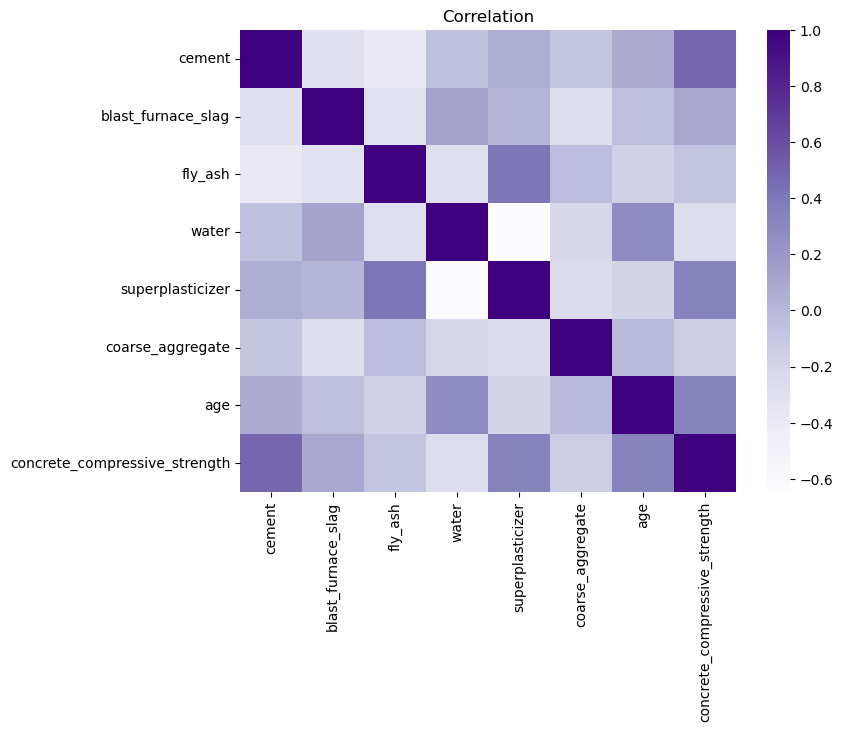

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 6))
corr = pre_c_df.corr()
heatmap = sns.heatmap(corr, cmap='Purples')
heatmap.set_title('Correlation')
plt.show()

In [86]:
corr

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,age,concrete_compressive_strength
cement,1.000000,-0.303324,-0.385610,-0.056625,0.060906,-0.086205,0.086348,0.488283
blast_furnace_slag,-0.303324,1.000000,-0.312352,0.130262,0.019800,-0.277559,-0.042759,0.103374
fly_ash,-0.385610,-0.312352,1.000000,-0.283314,0.414213,-0.026468,-0.158940,-0.080648
water,-0.056625,0.130262,-0.283314,1.000000,-0.646946,-0.212480,0.279284,-0.269624
superplasticizer,0.060906,0.019800,0.414213,-0.646946,1.000000,-0.241721,-0.194076,0.344209
coarse_aggregate,-0.086205,-0.277559,-0.026468,-0.212480,-0.241721,1.000000,-0.005264,-0.144717
age,0.086348,-0.042759,-0.158940,0.279284,-0.194076,-0.005264,1.000000,0.337367
concrete_compressive_strength,0.488283,0.103374,-0.080648,-0.269624,0.344209,-0.144717,0.337367,1.000000


In [90]:
corr.concrete_compressive_strength.sort_values(ascending=False)[1:]

cement                0.488283
superplasticizer      0.344209
age                   0.337367
blast_furnace_slag    0.103374
fly_ash              -0.080648
coarse_aggregate     -0.144717
water                -0.269624
Name: concrete_compressive_strength, dtype: float64

In [87]:
features, targets = pre_c_df.iloc[:, :-1], pre_c_df.iloc[:, -1]

get_vif(features)

,vif_score,feature
0,14.119092,cement
1,2.979166,blast_furnace_slag
2,3.953181,fly_ash
3,65.355432,water
4,3.952645,superplasticizer
5,55.858759,coarse_aggregate
6,1.669204,age


In [91]:
pre_c_df = pre_c_df.drop(labels=['fly_ash'], axis=1)
pre_c_df

,cement,blast_furnace_slag,water,superplasticizer,coarse_aggregate,age,concrete_compressive_strength
0,540.0,0.0,162.0,2.5,1040.0,28,79.99
1,540.0,0.0,162.0,2.5,1055.0,28,61.89
2,332.5,142.5,228.0,0.0,932.0,270,40.27
3,332.5,142.5,228.0,0.0,932.0,365,41.05
4,198.6,132.4,192.0,0.0,978.4,360,44.30
...,...,...,...,...,...,...,...
1025,276.4,116.0,179.6,8.9,870.1,28,44.28
1026,322.2,0.0,196.0,10.4,817.9,28,31.18
1027,148.5,139.4,192.7,6.1,892.4,28,23.70
1028,159.1,186.7,175.6,11.3,989.6,28,32.77


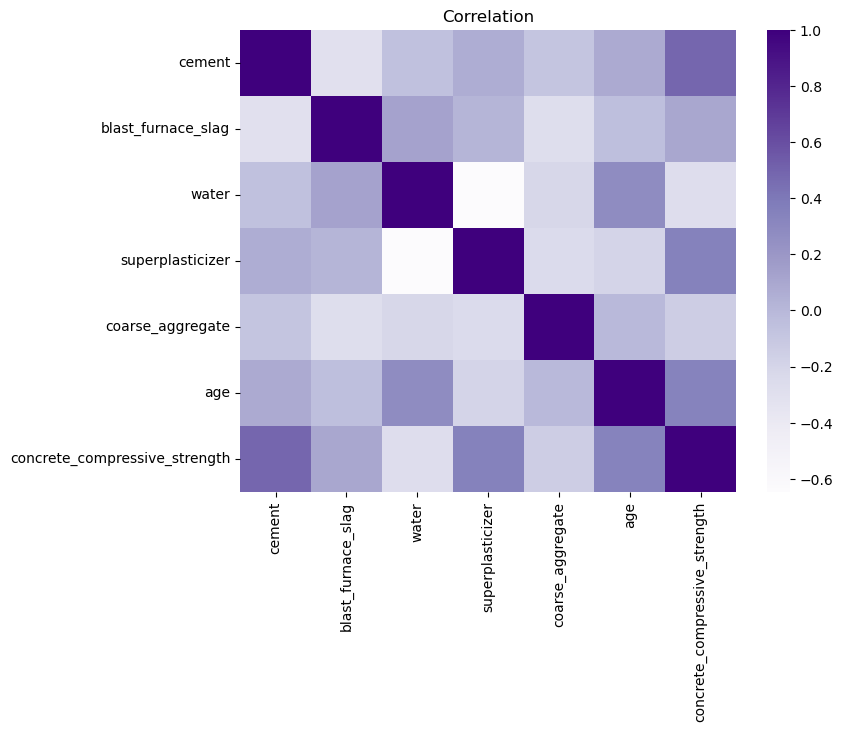

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 6))
corr = pre_c_df.corr()
heatmap = sns.heatmap(corr, cmap='Purples')
heatmap.set_title('Correlation')
plt.show()

In [97]:
corr

,cement,blast_furnace_slag,water,superplasticizer,coarse_aggregate,age,concrete_compressive_strength
cement,1.000000,-0.303324,-0.056625,0.060906,-0.086205,0.086348,0.488283
blast_furnace_slag,-0.303324,1.000000,0.130262,0.019800,-0.277559,-0.042759,0.103374
water,-0.056625,0.130262,1.000000,-0.646946,-0.212480,0.279284,-0.269624
superplasticizer,0.060906,0.019800,-0.646946,1.000000,-0.241721,-0.194076,0.344209
coarse_aggregate,-0.086205,-0.277559,-0.212480,-0.241721,1.000000,-0.005264,-0.144717
age,0.086348,-0.042759,0.279284,-0.194076,-0.005264,1.000000,0.337367
concrete_compressive_strength,0.488283,0.103374,-0.269624,0.344209,-0.144717,0.337367,1.000000


In [98]:
corr.concrete_compressive_strength.sort_values(ascending=False)[1:]

cement                0.488283
superplasticizer      0.344209
age                   0.337367
blast_furnace_slag    0.103374
coarse_aggregate     -0.144717
water                -0.269624
Name: concrete_compressive_strength, dtype: float64

In [99]:
features, targets = pre_c_df.iloc[:, :-1], pre_c_df.iloc[:, -1]

get_vif(features)

,vif_score,feature
0,8.759589,cement
1,2.006371,blast_furnace_slag
2,58.489498,water
3,2.359412,superplasticizer
4,55.407902,coarse_aggregate
5,1.651127,age


In [100]:
pre_c_df = pre_c_df.drop(labels=['water'], axis=1)
pre_c_df

,cement,blast_furnace_slag,superplasticizer,coarse_aggregate,age,concrete_compressive_strength
0,540.0,0.0,2.5,1040.0,28,79.99
1,540.0,0.0,2.5,1055.0,28,61.89
2,332.5,142.5,0.0,932.0,270,40.27
3,332.5,142.5,0.0,932.0,365,41.05
4,198.6,132.4,0.0,978.4,360,44.30
...,...,...,...,...,...,...
1025,276.4,116.0,8.9,870.1,28,44.28
1026,322.2,0.0,10.4,817.9,28,31.18
1027,148.5,139.4,6.1,892.4,28,23.70
1028,159.1,186.7,11.3,989.6,28,32.77


In [105]:
features, targets = pre_c_df.iloc[:, :-1], pre_c_df.iloc[:, -1]

get_vif(features)

,vif_score,feature
0,8.176736,cement
1,1.724853,blast_furnace_slag
2,2.072887,superplasticizer
3,10.012147,coarse_aggregate
4,1.583114,age


In [101]:
features, targets = pre_c_df.iloc[:, :-1], pre_c_df.iloc[:, -1]

poly_features = PolynomialFeatures(degree=3).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=124)

X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(X_train, y_train, test_size=0.2, random_state=124)

lgb_r = LGBMRegressor(n_estimators=100)

lgb_r.fit(X_train, y_train)

prediction = lgb_r.predict(X_test)
get_evaluation(y_test, prediction)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000358 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8065
[LightGBM] [Info] Number of data points in the train set: 804, number of used features: 55
[LightGBM] [Info] Start training from score 35.086517
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [102]:
lgb_r.fit(X_train_val, y_train_val)

prediction = lgb_r.predict(X_test_val)
get_evaluation(y_test_val, prediction)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000375 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6439
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 55
[LightGBM] [Info] Start training from score 35.273421
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000495 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8065
[LightGBM] [Info] Number of data points in the train set: 804, number of used features: 55
[LightGBM] [Info] Start training from score 35.086517
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
MSE: 4.7384, RMSE: 2.1768, MSLE: 0.0039, RMSLE: 0.0623, R2:

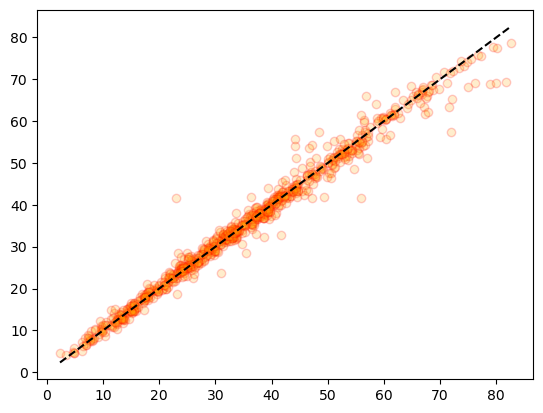

In [103]:
lgb_r.fit(X_train, y_train)
prediction = lgb_r.predict(X_train)
get_evaluation(y_train, prediction)

fig, ax = plt.subplots()
ax.scatter(y_train, prediction, edgecolors='red', c='orange', alpha=0.2)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
plt.show()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000555 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8065
[LightGBM] [Info] Number of data points in the train set: 804, number of used features: 55
[LightGBM] [Info] Start training from score 35.086517
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
MSE: 20.8434, RMSE: 4.5655, MSLE: 0.0228, RMSLE: 0.1509, R2

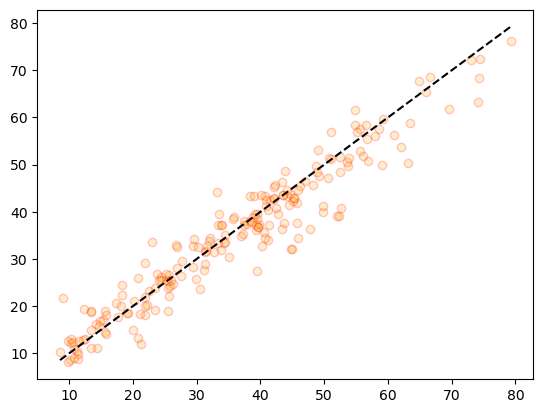

In [104]:
lgb_r.fit(X_train, y_train)
prediction = lgb_r.predict(X_test)
get_evaluation(y_test, prediction)

fig, ax = plt.subplots()
ax.scatter(y_test, prediction, edgecolors='red', c='orange', alpha=0.2)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.show()

- vif는 아주 적절해졌으나 여전히 과적합이 해소되지않은것같아 하이퍼 파라미터 튜닝

In [107]:
features, targets = pre_c_df.iloc[:, :-1], pre_c_df.iloc[:, -1]

poly_features = PolynomialFeatures(degree=3).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=124)

X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(X_train, y_train, test_size=0.2, random_state=124)

lgb_r = LGBMRegressor(n_estimators=50, max_depth=2, min_child_samples=20)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000562 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8065
[LightGBM] [Info] Number of data points in the train set: 804, number of used features: 55
[LightGBM] [Info] Start training from score 35.086517
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
MSE: 34.1654, RMSE: 5.8451, MSLE: 0.0369, RMSLE: 0.1921, R2: 0.8722


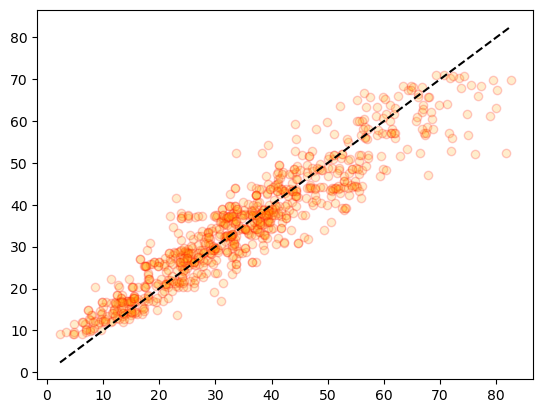

In [108]:
import matplotlib.pyplot as plt

# lgb_r = LGBMRegressor(n_estimators=50)

lgb_r.fit(X_train, y_train)
prediction = lgb_r.predict(X_train)
get_evaluation(y_train, prediction)

fig, ax = plt.subplots()
ax.scatter(y_train, prediction, edgecolors='red', c='orange', alpha=0.2)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
plt.show()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000680 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8065
[LightGBM] [Info] Number of data points in the train set: 804, number of used features: 55
[LightGBM] [Info] Start training from score 35.086517
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
MSE: 41.4416, RMSE: 6.4375, MSLE: 0.0422, RMSLE: 0.2054, R2: 0.8375


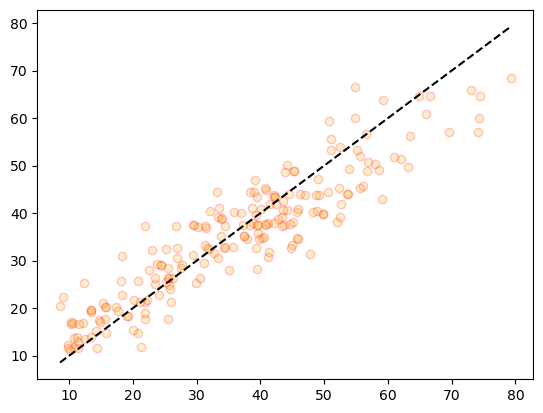

In [109]:
lgb_r.fit(X_train, y_train)
prediction = lgb_r.predict(X_test)
get_evaluation(y_test, prediction)

fig, ax = plt.subplots()
ax.scatter(y_test, prediction, edgecolors='red', c='orange', alpha=0.2)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.show()

In [71]:
lgb_r

LGBMRegressor(max_depth=2, min_child_samples=10, n_estimators=50)

### 요약
- 중복행 삭제만 진행한 후 LinearRegression 모델을 통해 선형 회귀 예측을 수행했을 때 R2가 약 0.5443으로  
  해당 데이터세트가 비선형 데이터라고 간주하기엔 낮은 수치가 아니었으나 Polynomial 후 R2스코어가 0.8436로 크게 증가하였으며  
  DecisionTree 모델에서 0.8109이며 LGBM의 R2는 0.9255로 나타났습니다.  
  따라서 해당 데이터는 비선형적인 모습을 띄고있다고 판단됩니다.
- 가장 높은 R2스코어가 나온 LGBM 모델을 kfold와 검증데이터세트를 사용해 검증 결과 조금의 과적합이 의심되어 LGBM의 하이퍼파라미터 튜닝을 통해  
  과적합을 방지하였습니다.
- 하이퍼 파라미터 튜닝 전 train데이터의 R2: 0.9830, test데이터의 R2: 0.9149였던 결과를 다중공선성이 높은 피쳐 몇개를 제거하고
- 하이퍼 파라미터 튜닝 후 train데이터의 R2: 0.8722, test데이터의 R2: 0.8375로 어느정도 과적합이 해소 되었다고 판단하였습니다.